In [7]:
import os
import numpy as np
from base import *

In [8]:
pth = r'\\10.99.68.52\Kiemendata\Valentina Matos\tissues for methods paper\mouse liver hannah'
pthim = os.path.join(pth, '10x')
umpix = 1
pthtest = os.path.join(pth, 'test')
pthtestim = os.path.join(pthtest, '10x')
nm = '01_22_2025_valentina'
resolution = '10x'

WS = [[0, 0, 0, 0, 0, 2, 2], 
      [6, 5], 
      [1, 2, 3, 4, 5, 6, 6], 
      [1, 5, 4, 3, 2, 7, 6], 
      []]

numclass = max(WS[2])
sxy = 1024
pthDL = os.path.join(pth, nm)
nblack = numclass + 1
nwhite = WS[1][0]
cmap = np.array([[128,   0, 128],
               [  0, 128, 255],
               [  0, 128,   0],
               [255,   0,   0],
               [255, 128, 192],
               [255, 255, 255]])

classNames = ['hepatocyte', 'bile_duct', 'tumor', 'vasculature', 'stroma', 'background']
classCheck = []
ntrain = 15
nvalidate = np.ceil(ntrain/5)
nTA = 2

Saving model metadata and classification colormap...
Max WS[2]: 6
Classnames: ['hepatocyte', 'bile_duct', 'tumor', 'vasculature', 'stroma', 'background']
Creating Net metadata file...


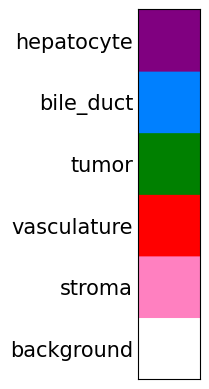

In [4]:
save_model_metadata_GUI(pthDL, pthim,pthtest, WS, nm, umpix, cmap, sxy, classNames, ntrain, nvalidate, nTA = 3,final_df = None, combined_df = None, model_type="DeepLabV3_plus", batch_size=3)

In [5]:
WSI2tif(pth, resolution, umpix)

In [ ]:
# Determine optimal TA
determine_optimal_TA(pthim, nTA)

In [ ]:
[ctlist0, numann0] = load_annotation_data(pthDL, pth, pthim, classCheck)

In [ ]:
create_training_tiles(pthDL, numann0, ctlist0)

TensorFlow is using the following GPU: LogicalDevice(name='/device:GPU:0', device_type='GPU')
Calculating class weights...
Class frequencies:
hepatocyte: 0.2925
bile_duct: 0.0161
tumor: 0.0308
vasculature: 0.0184
stroma: 0.0550
background: 0.1714
black: 0.4277

Class weights:
hepatocyte: 0.1881
bile_duct: 3.4249
tumor: 1.7857
vasculature: 2.9839
stroma: 1.0000
background: 0.3210
black: 0.1286
Class weights: [0.18805208972281992, 3.4249414041829964, 1.7856991470555243, 2.9839432837785664, 1.0, 0.32095269607080484, 0.12861586712371373]
Starting model training...
Epoch 1/8
500/500 [==============================] - 207s 387ms/step - loss: 0.2251 - accuracy: 0.8621 - val_loss: 1.1549 - val_accuracy: 0.5881
Epoch 2/8
500/500 [==============================] - 187s 373ms/step - loss: 0.1275 - accuracy: 0.9162 - val_loss: 0.5486 - val_accuracy: 0.6954
Epoch 3/8
500/500 [==============================] - 189s 378ms/step - loss: 0.0958 - accuracy: 0.9341 - val_loss: 0.2342 - val_accuracy: 0.817

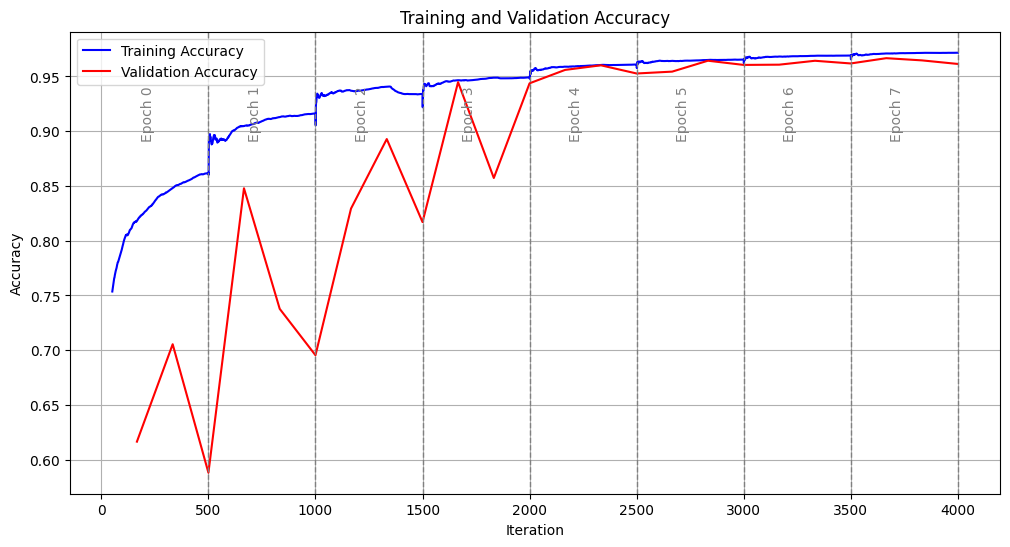

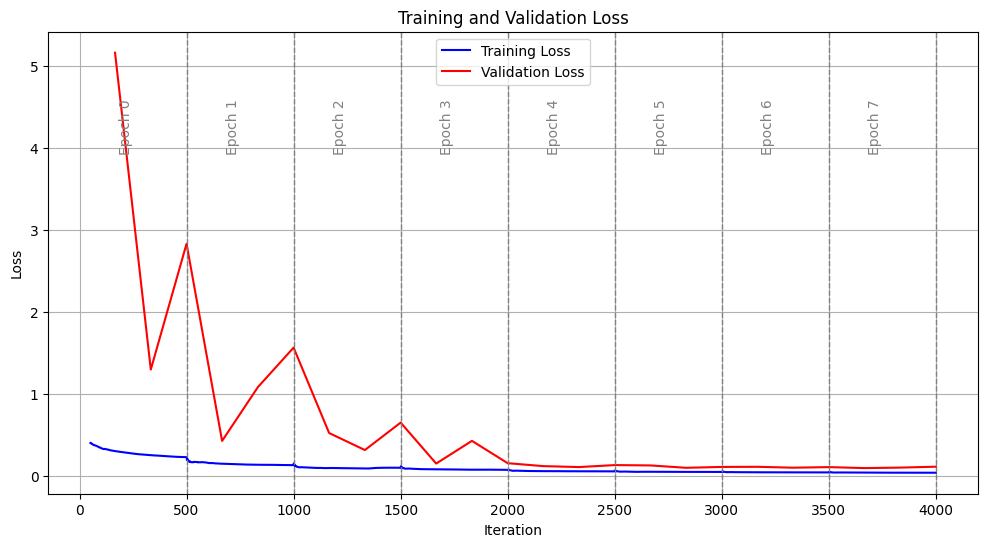

In [5]:
train_segmentation_model_cnns(pthDL)

No .ndpi or .svs files found in the directory.
Testing segmentation model......
 
Importing annotation data...
Image 1 of 1: A7274 LIV_ome
 annotation data previously loaded
   
  Starting classification of image 1 of 1: A7274 LIV_ome.tif
Image 1 of 1 took 186 s
  Total time for classification: 0.0h 4.0m 11.210754871368408s


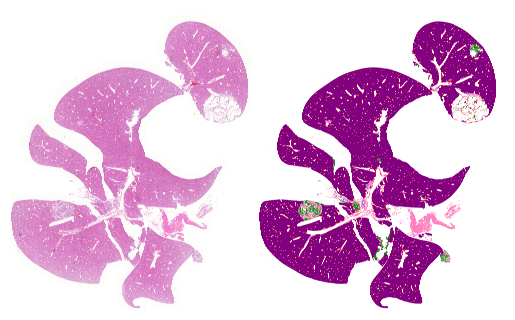


Calculating total number of pixels in the testing dataset...
  There are 637631 pixels of hepatocyte, 70% of the most common class.
  There are 28890 pixels of bile_duct, 3% of the most common class.
  There are 228954 pixels of tumor, 25% of the most common class.
  There are 68598 pixels of vasculature, 7% of the most common class.
  There are 105486 pixels of stroma, 11% of the most common class.
  There are 908133 pixels of background. This is the most common class.


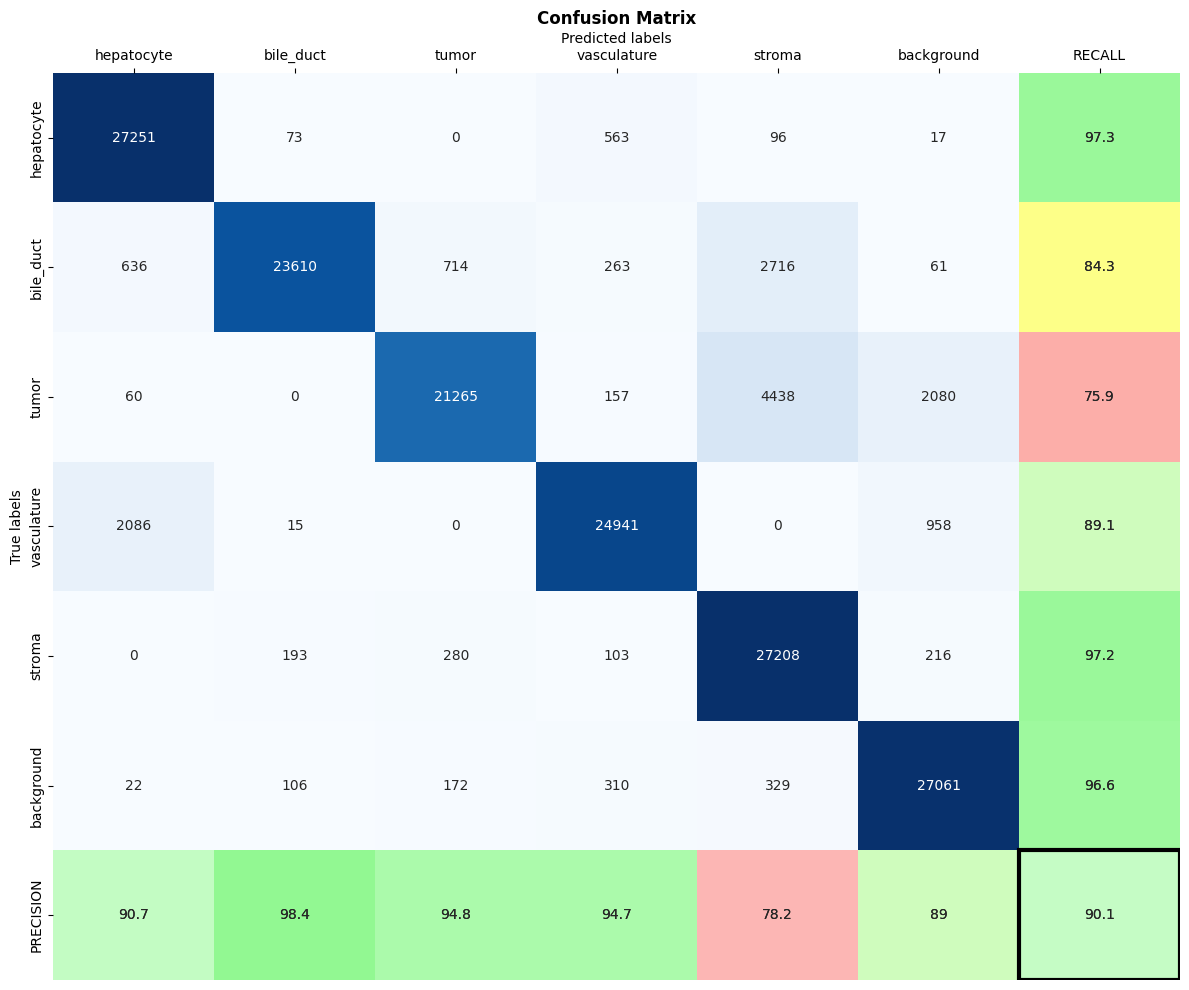


Confusion matrix saved to \\10.99.68.52\Kiemendata\Valentina Matos\tissues for methods paper\mouse liver hannah\01_22_2025_valentina\confusion_matrixDeepLabV3_plus.jpg

Overall Accuracy: 90.1%


In [9]:
WSI2tif(pthtest, resolution, umpix)
test_segmentation_model(pthDL,pthtest, pthtestim, cnn_name = "DeepLabV3_plus")

In [ ]:
classify_images(pthim,pthDL, name = "DeepLabV3_plus")